<a href="https://colab.research.google.com/github/VadymBoyko/DS-HW01/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import zipfile
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [63]:
zip_ref = zipfile.ZipFile('data.zip', 'r')
zip_ref.extractall('')

In [64]:
df_2d = pd.read_csv('/content/data/data_2d.csv')
df_mnist = pd.read_csv('/content/data/mnist.csv')

In [65]:
df_mnist.shape

(499, 785)

In [66]:
df_2d.shape

(199, 3)

In [67]:
df_mnist

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df_2d

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


In [69]:
df_2d.iloc[:, 0].unique()

array([0., 1.])

In [70]:
X_2d = df_2d.iloc[:, 1:3].values
y_2d = df_2d.iloc[:, 0].values

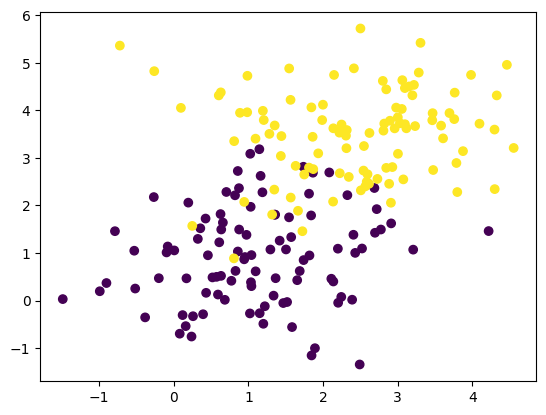

In [71]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d)
plt.show()

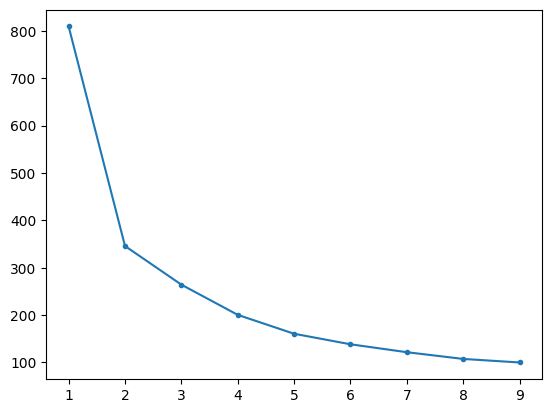

In [72]:
clusters = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init="auto").fit(X_2d)
    clusters.append(kmeans.inertia_)

plt.plot(range(1, 10), clusters, marker=".")
plt.show()

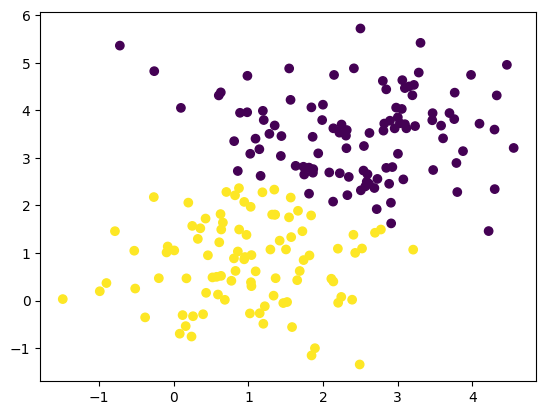

In [73]:
kmeans=KMeans(n_clusters=2,random_state=0, n_init="auto").fit(X_2d)
plt.scatter(X_2d[:,0], X_2d[:,1], c=kmeans.labels_)
plt.show()

In [74]:
kmeans.cluster_centers_

array([[2.46540572, 3.48660748],
       [0.99657712, 0.80580517]])

**Mnist**

In [76]:
df_mnist_norm = StandardScaler().fit_transform(df_mnist)
df_mnist_pca = PCA(n_components=2, svd_solver='full').fit_transform(df_mnist_norm)

In [80]:
df_mnist_pca[0:10]

array([[  4.96157025, -12.44322774],
       [ -6.93079104,  -5.8749658 ],
       [  8.58008648,  -0.35986824],
       [  1.1271354 ,   6.57424819],
       [ -7.58786988,  -5.58524375],
       [ -1.25952708,   4.33607341],
       [ -3.58164785,   5.11992598],
       [  3.71387625,   0.82098156],
       [ -0.41301879,   4.37791736],
       [ 13.89805991,  -4.91707027]])

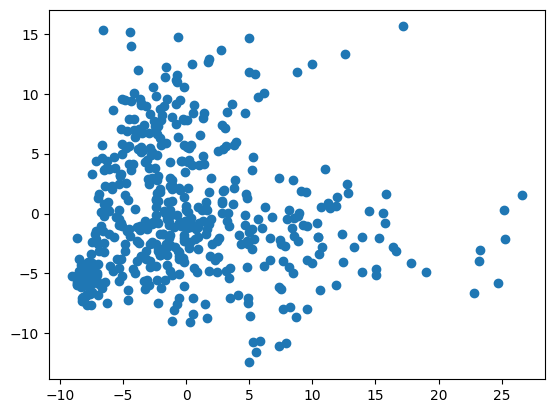

In [81]:
plt.scatter(df_mnist_pca[:,0], df_mnist_pca[:,1])
plt.show()

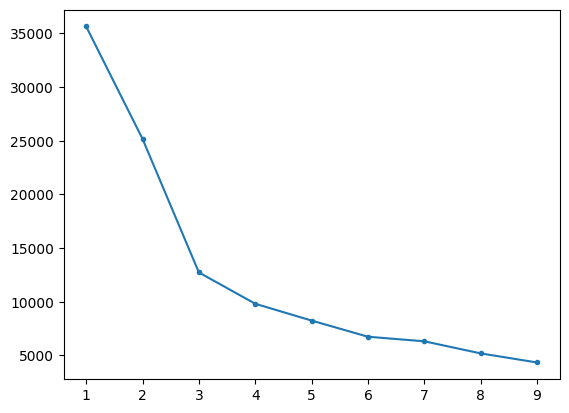

In [83]:
mnist_clusters = []

for k in range(1, 10):
    mnist_kmeans = KMeans(n_clusters=k, n_init="auto").fit(df_mnist_pca)
    mnist_clusters.append(mnist_kmeans.inertia_)

plt.plot(range(1, 10), mnist_clusters, marker=".")
plt.show()

In [84]:
kmeans_mnist = KMeans(n_clusters=3,random_state=0, n_init="auto").fit(df_mnist_pca)

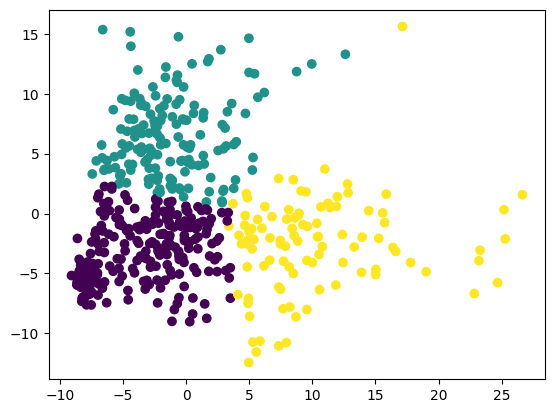

In [85]:
plt.scatter(df_mnist_pca[:,0], df_mnist_pca[:,1], c=kmeans_mnist.labels_)
plt.show()

In [86]:
kmeans_mnist.cluster_centers_

array([[-3.34903551, -3.12253634],
       [-1.18788022,  6.4895193 ],
       [10.24144755, -2.62199657]])